# EDA

General Outline of EDA
The code template shall perform the following steps:
1. Preview data
2. Check total number of entries and column types
3. Check any null values
4. Check duplicate entries
5. Plot distribution of numeric data (univariate and pairwise joint distribution)
6. Analyse time series of numeric data by daily, monthly and yearly frequencies

 https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9
 

Exploratory Data Analysis does two main things:
1. It helps clean up a dataset.
2. It gives you a better understanding of the variables and the relationships between them.

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline
import missingno


In [2]:
# building = pd.read_csv('../input/ashrae-energy-prediction/building_metadata.csv')
# weather_train = pd.read_csv('../input/ashrae-energy-prediction/weather_train.csv')
# weather_test = pd.read_csv('../input/ashrae-energy-prediction/weather_test.csv')
# train = pd.read_csv('../input/ashrae-energy-prediction/train.csv')
# test = pd.read_csv('../input/ashrae-energy-prediction/test.csv')

In [3]:
pwd()

'C:\\Users\\Shayan Haider\\Desktop\\Upwork\\Projects\\Alastair-Sumo\\sumo_squat_counter\\python-project'

# Read in files and concatenate them all with filename in column

In [4]:
import pandas as pd
import glob, os

#files = glob.glob('/Users/samwise/Downloads/Task1_Scripts/kW Data/Portal_Cleaned/DC_pre_12_months/*.csv')
files = glob.glob(r'C:\Users\Shayan Haider\Desktop\python-project\*.csv')
df = pd.concat([pd.read_csv(fp).assign(Meterid=os.path.basename(fp)) for fp in files])

In [5]:
df = df.assign(id=(df['Meterid']).astype('category').cat.codes)  # Assign unique ID to each meter id

In [6]:
df["time"] = pd.to_datetime(df["time"]) # Convert time column to the datetime format

In [7]:
df.dtypes

time       datetime64[ns]
eload             float64
Temp              float64
Meterid            object
id                  int16
dtype: object

## Glimpse of the data

In [8]:
print('Size of train_df data', df.shape)

Size of train_df data (1184001, 5)


In [9]:
df['id'] = df['id'].astype(float) # Convert id column to float

In [10]:
df['id'].nunique()  # Check to see how many meter id's we are dealing with

178

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184001 entries, 0 to 8642
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   time     1183823 non-null  datetime64[ns]
 1   eload    1183823 non-null  float64       
 2   Temp     1183823 non-null  float64       
 3   Meterid  1184001 non-null  object        
 4   id       1184001 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 49.7+ MB


,time,eload,Temp,Meterid,id
0,2013-02-02 00:00:00,145.34,21.0,12_T_DC_1 - Copy (2).csv,0.0
1,2013-02-02 01:00:00,145.14,21.0,12_T_DC_1 - Copy (2).csv,0.0
2,2013-02-02 02:00:00,143.73,19.9,12_T_DC_1 - Copy (2).csv,0.0
3,2013-02-02 03:00:00,143.48,19.9,12_T_DC_1 - Copy (2).csv,0.0
4,2013-02-02 04:00:00,142.35,19.0,12_T_DC_1 - Copy (2).csv,0.0


In [12]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8633, 8634, 8635, 8636, 8637, 8638, 8639, 8640, 8641, 8642],
           dtype='int64', length=1184001)

In [13]:
df.index_col=['id']

In [14]:
df.head()

,time,eload,Temp,Meterid,id
0,2013-02-02 00:00:00,145.34,21.0,12_T_DC_1 - Copy (2).csv,0.0
1,2013-02-02 01:00:00,145.14,21.0,12_T_DC_1 - Copy (2).csv,0.0
2,2013-02-02 02:00:00,143.73,19.9,12_T_DC_1 - Copy (2).csv,0.0
3,2013-02-02 03:00:00,143.48,19.9,12_T_DC_1 - Copy (2).csv,0.0
4,2013-02-02 04:00:00,142.35,19.0,12_T_DC_1 - Copy (2).csv,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184001 entries, 0 to 8642
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   time     1183823 non-null  datetime64[ns]
 1   eload    1183823 non-null  float64       
 2   Temp     1183823 non-null  float64       
 3   Meterid  1184001 non-null  object        
 4   id       1184001 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 49.7+ MB


In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of n

Preview of data:


,time,eload,Temp,Meterid,id
0,2013-02-02 00:00:00,145.34,21.0,12_T_DC_1 - Copy (2).csv,0.0
1,2013-02-02 01:00:00,145.14,21.0,12_T_DC_1 - Copy (2).csv,0.0
2,2013-02-02 02:00:00,143.73,19.9,12_T_DC_1 - Copy (2).csv,0.0



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184001 entries, 0 to 8642
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   time     1183823 non-null  datetime64[ns]
 1   eload    1183823 non-null  float64       
 2   Temp     1183823 non-null  float64       
 3   Meterid  1184001 non-null  object        
 4   id       1184001 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 49.7+ MB
None

Preview of data with null values:


,time,eload,Temp,Meterid,id
8557,NaT,NaN,NaN,12_T_DC_1 - Copy (2).csv,0.0
8557,NaT,NaN,NaN,12_T_DC_1 - Copy (3).csv,1.0
8557,NaT,NaN,NaN,12_T_DC_1 - Copy - Copy.csv,2.0


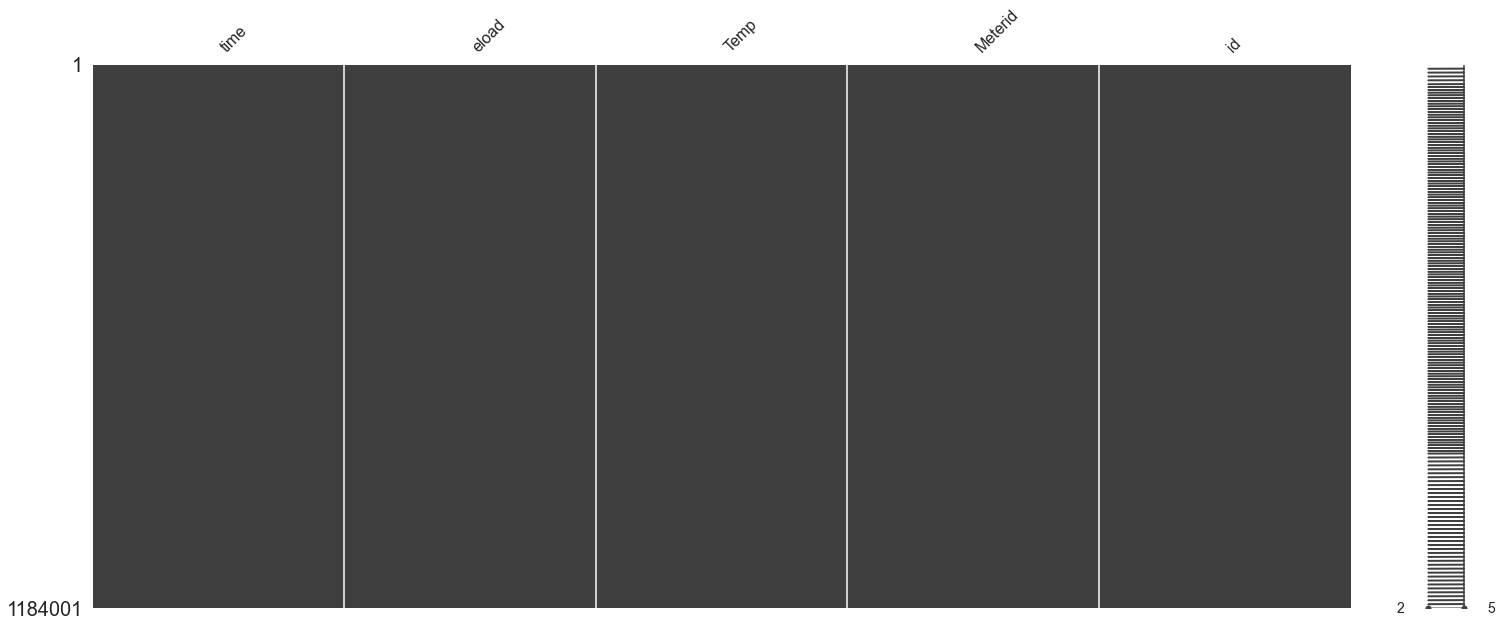


No duplicated entries found

To check: 
Unique count of non-numeric data

Meterid    178
dtype: int64
Top 5 unique values of Meterid
                                          Meterid  Count
0  12_T_DC_8 - Copy - Copy - Copy (15) - Copy.csv   8643
1  12_T_DC_8 - Copy - Copy - Copy (12) - Copy.csv   8643
2          12_T_DC_8 - Copy - Copy - Copy (5).csv   8643
3  12_T_DC_8 - Copy - Copy - Copy (11) - Copy.csv   8643
4          12_T_DC_8 - Copy - Copy - Copy (6).csv   8643
 

To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
eload,1183823.0,24.868986,45.983985,0.01,0.2,0.28,42.56,389.23
Temp,1183823.0,56.343177,17.823538,7.00,41.0,57.15,72.00,95.00
id,1184001.0,93.614217,53.553822,0.00,47.0,96.00,143.00,177.00


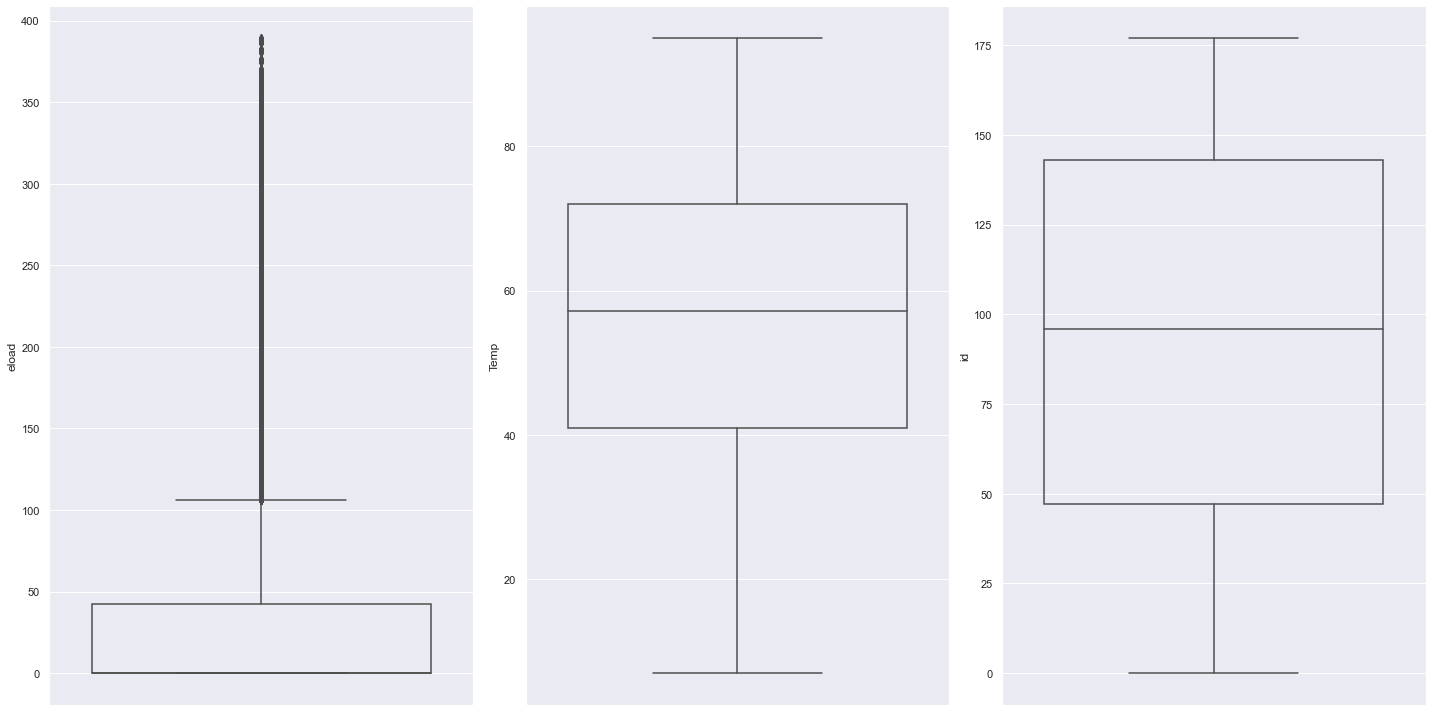


To check pairwise joint distribution of numeric data


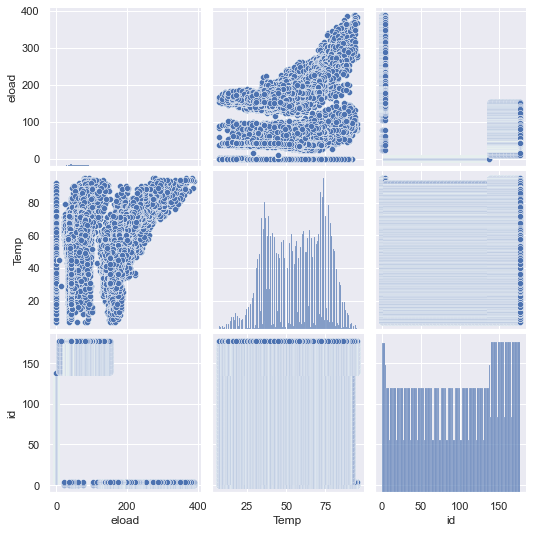

In [17]:
eda(df)

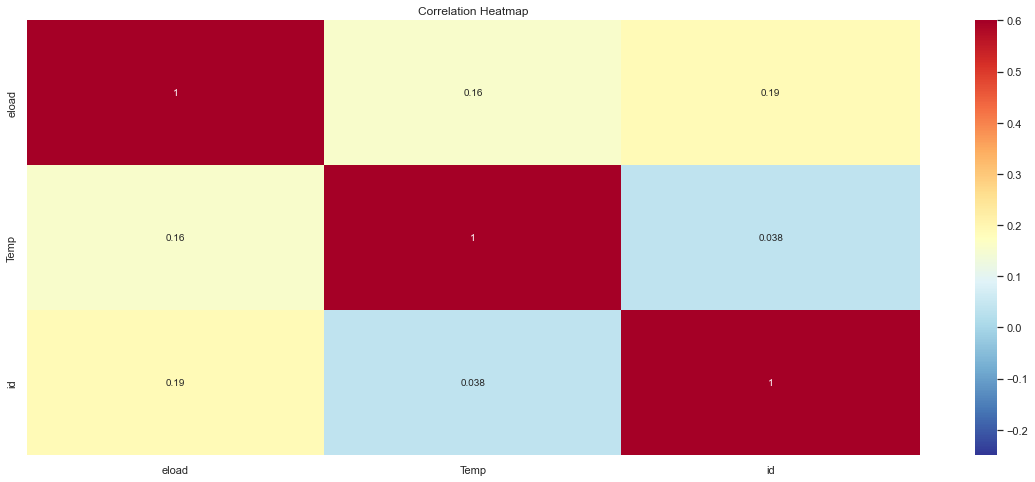

In [18]:
corr=df.corr()
plt.figure(figsize = (20, 8))

# Heatmap of correlations
sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

## Mean Meter Reading by Hour and Day for entire dataset

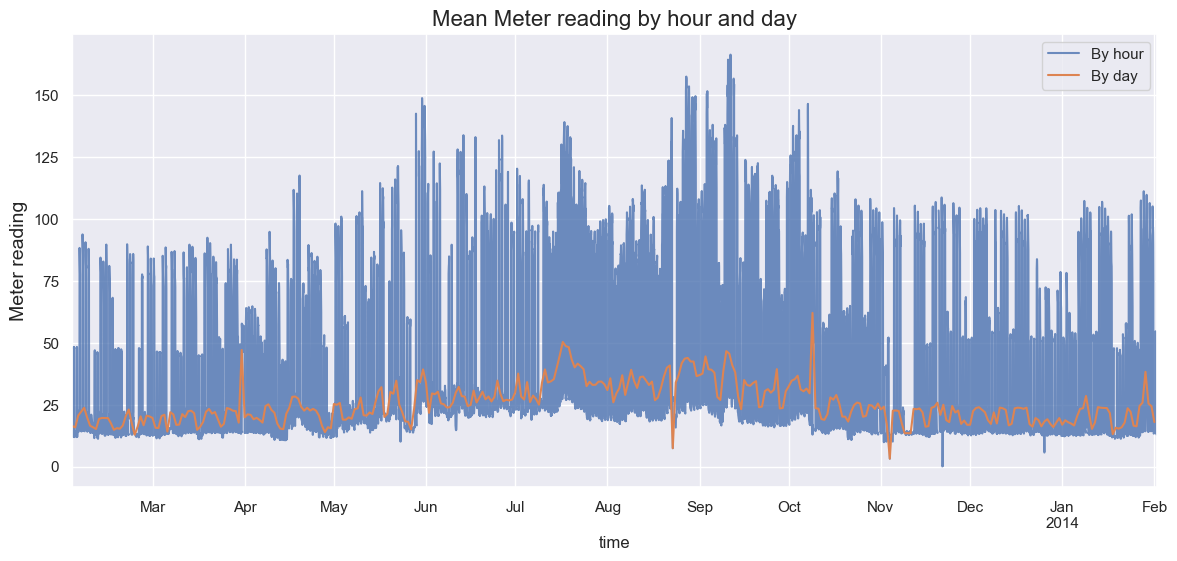

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=100)
df[['time', 'eload']].set_index('time').resample('H').mean()['eload'].plot(ax=axes, label='By hour', alpha=0.8).set_ylabel('Meter reading', fontsize=14);
df[['time', 'eload']].set_index('time').resample('D').mean()['eload'].plot(ax=axes, label='By day', alpha=1).set_ylabel('Meter reading', fontsize=14);
axes.set_title('Mean Meter reading by hour and day', fontsize=16);
axes.legend();

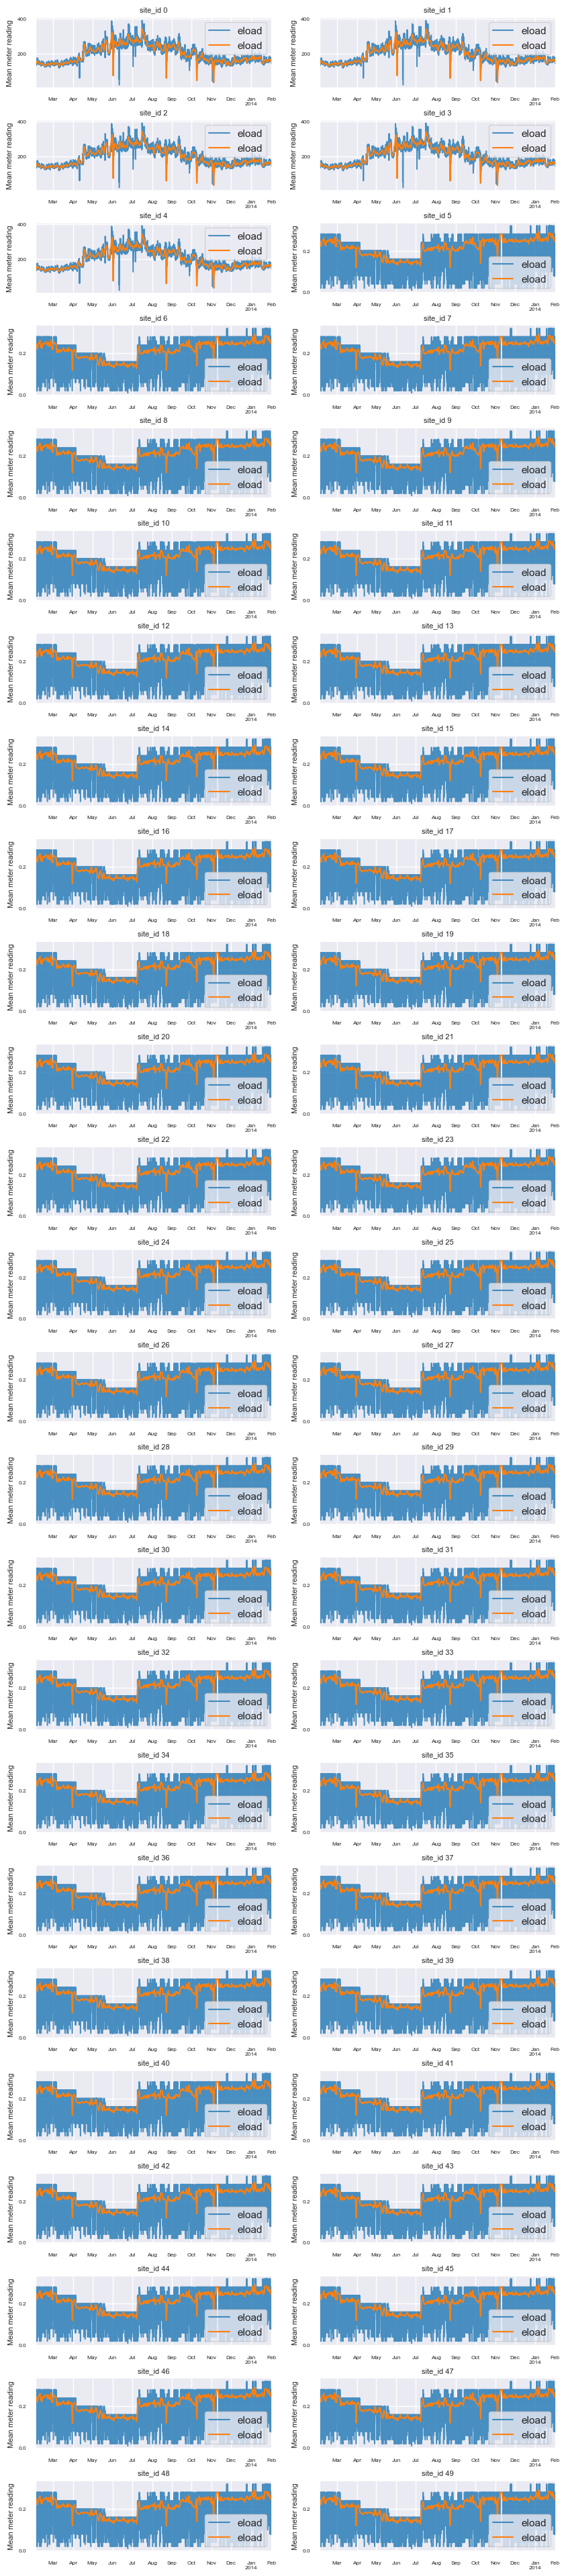

In [46]:
fig, axes = plt.subplots(25,2,figsize=(10,50), dpi=100)
#for i in range(df['id'].nunique()):
for i in range(50):
    df[df['id'] == i][['time', 'eload']].set_index('time').resample('H').mean()['eload'].plot(ax=axes[i//2][i%2], alpha=0.8, color='tab:blue',fontsize=6).set_ylabel('Mean meter reading', fontsize=8);
    df[df['id'] == i][['time', 'eload']].set_index('time').resample('D').mean()['eload'].plot(ax=axes[i//2][i%2], alpha=1, color='tab:orange',fontsize=6).set_xlabel('');
    axes[i//2][i%2].legend();
    axes[i//2][i%2].set_title('site_id {}'.format(i), fontsize=8);
    plt.subplots_adjust(hspace=0.45)

In [ ]:
#df[df['id'] == 0][['time', 'eload']].set_index('time').resample('H').mean()['eload'].plot(ax=axes[i%9][i//9], alpha=0.8, color='tab:blue',fontsize=6).set_ylabel('Mean meter reading', fontsize=8);


In [ ]:
fig, axes = plt.subplots(8,2,figsize=(14,36), dpi=100)
for i in range(df['id'].nunique()):
    df[df['id'] == i][['time', 'eload']].set_index('time').plot(ax=axes[i%9][i//9], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Meter reading', fontsize=13);
    #df[df['id'] == i][['time', 'temp']].set_index('temp').plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    plt.subplots_adjust(hspace=0.45)

In [ ]:
# CBECS COMMERCIAL BUILDING STANDARD ABOUT ~18KWH PER SQFT PER YEAR, 100K OFFICE SQFT BLDG
# CUT OFF ANYTHING BELOW 10KWH

# Histogram that lines up the annual consumption for each building ( Average daily consumption*365)
# Highest first


# CLean up with less plots per row

# Run for each data source we did for peak prediction


# Picking real peaks!

# EDA

In [ ]:
# https://www.kaggle.com/caesarlupum/ashrae-start-here-a-gentle-introduction

##### Examine the Distribution of the Target Column

In [ ]:
df

### Visualize Missing Data and Zeroes

In [ ]:
df1=df

In [ ]:
train = df.set_index(['time'])

In [ ]:
train = train.fillna(0)   #Shayan

In [ ]:
train.info()

In [ ]:
train.eload=train.eload.astype(int)
train.Temp=train.Temp.astype(int)

In [ ]:
df1["time"] = pd.to_datetime(df1["time"]) # Convert time column to the datetime format

In [ ]:
train.head(5)

In [ ]:
df1.head(5)

### Examine Missing Values
Number and percentage of missing values in each column

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data.head(4)

### Plotting

In [ ]:
df.Meterid.nunique()  # Number of unique meters in the dataset

In [ ]:
df['eload'].hist(figsize=(16, 8))

In [ ]:
def plot_dist_col(column):
    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(df[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    #sns.distplot(weather_test_df[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['eload'])
    plt.show()

In [ ]:
plot_dist_col('eload')

In [ ]:
plot_dist_col('Temp')

### Simple Single Series Analysis

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ts=df.groupby(["time"])["eload"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('meter_reading')
plt.xlabel('timestamp')
plt.ylabel('meter_reading')
plt.plot(ts);

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

In [ ]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()

In [ ]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
fig = res.plot()

In [ ]:
total_ids = df['id'].nunique() #Get total numbers of ids
indiv_ids_list = [] #Blank list 
for i in range(total_ids):
    indiv_id = df.loc[df['id'] == float(i)] #Store an individual id
    indiv_id = indiv_id.fillna(0)
    if(indiv_id.eload.mean() < 10.0):
        print(indiv_id.eload.mean())
        indiv_ids_list.append(indiv_id)
#Indiv_ids _list contains Dicts (ids) that follow the mean < 10 criteria
    
